*This notebook is an exploration of the 0-1 knapsack problem as formulated by lecture 1 and 2 of MIT's 6.00.2x course.*

<hr>

# The 0/1 Knapsack Problem

The 0/1 Knapsack problem occurs whenever you want to maximize some value by selecting an optimal subset of items while obeying certain constraints. For example, a robber trying to figure out which items to steal; he can't take everything (too heavy) so he wants to maximize the amount of value he can take. Another formulation has an individual on a calorie-restricting diet; she wants to maximize the enjoyment from the food she eats while still staying beneath some set calorie limit.

As an aside, it's called the "0/1" knapsack problem because it is discrete; the robber either takes an item or does not, food is either consumed or left untouched. The "continuous" knapsack problem is significantly easier to solve as you can just take as much as possible right up to the limit; for example, if the robber comes across a store of gold dust then he can just fill his bag as high as it can go.

## Diet Scenario

I will look at the diet scenario as it is the one covered by the course.

> Dave is on a calorie-restricting diet that limits him to 750 calories per meal. He arrives at a restaurant and is trying to decide what to order. He assigns pleasure values to each food and makes note of their cost (in calories).

**Simplification**: each item on the menu can only be ordered once.

### Data

Provided by the course.

I'm going to try out [pandas](http://pandas.pydata.org/) for this.

In [1]:
import pandas as pd

In [2]:
# Read data from csv file
data = pd.read_csv("food-value-calories.csv")

In [3]:
# Display the data 
# head() displays a default 5 elements. To view all, pass the total number of elements (is there a better way?)
data.head(len(data))

,Food,Value,Calories
0,wine,89,123
1,beer,90,154
2,pizza,95,258
3,burger,100,354
4,fries,90,365
5,cola,79,150
6,apple,50,95
7,donut,10,195


In [4]:
# Compute some descriptive statistics
data.describe()

,Value,Calories
count,8.000000,8.000000
mean,75.375000,211.750000
std,30.556447,103.368619
min,10.000000,95.000000
25%,71.750000,143.250000
50%,89.500000,174.500000
75%,91.250000,282.000000
max,100.000000,365.000000


In [5]:
# Plot (because why not)
%matplotlib inline
import matplotlib.pyplot as plt
# Set style
import matplotlib
matplotlib.style.use('ggplot')

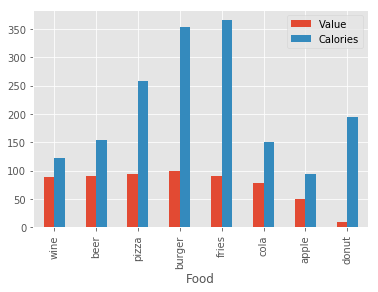

In [6]:
data.plot(kind="bar", x="Food")

## Tackling the Problem

The objective is to find the set of menu items with the highest value while still amounting to less than or equal to 750 calories. For instance, Dave could pick:

- wine

- burger

- donut

Which has a total value of 234 and a total cost of 476 calories. This is a valid choice, but is not optimal.

## Finding an Optimal Solution

Finding an optimal solution is straightforward:

1. Gather all possible sets of items

2. Eliminate invalid sets (i.e. sets with calorie counts larger than 750)

3. Sort the sets by value

4. The first set in the sorted list of sets is the optimal solution

### Implementation

I am not familar enough with Pandas to use it properly, so I'm going to convert the data into a regular Python list.

In [7]:
menu = data.values.tolist()
menu

[['wine', 89, 123],
 ['beer', 90, 154],
 ['pizza', 95, 258],
 ['burger', 100, 354],
 ['fries', 90, 365],
 ['cola', 79, 150],
 ['apple', 50, 95],
 ['donut', 10, 195]]

In [8]:
# Set constant
CALORIE_LIMIT = 750

In [9]:
def power_set(set_):
    """Binary powerset algorithm."""
    power_set = []
    
    power_cardinality = 2**len(set_)
    
    # the number of binary digits needed
    digit_count = len(set_)
    
    # setting up the formatting
    format_spec = '0' + str(digit_count) + 'b' 
    
    for n in range(power_cardinality):
        subset = []
        
        binary_n = format(n, format_spec)
        
        # for every character in a binary number
        for i, char in enumerate(binary_n):
            if char == '1':
                # when char is 1, the element in set_ with matching index is present in the subset
                subset.append(set_[i])
                
        power_set.append(subset)
    
    return power_set

In [10]:
# The powerset is the list of all possible sets of items
menu_power = power_set(menu)
menu_power

[[],
 [['donut', 10, 195]],
 [['apple', 50, 95]],
 [['apple', 50, 95], ['donut', 10, 195]],
 [['cola', 79, 150]],
 [['cola', 79, 150], ['donut', 10, 195]],
 [['cola', 79, 150], ['apple', 50, 95]],
 [['cola', 79, 150], ['apple', 50, 95], ['donut', 10, 195]],
 [['fries', 90, 365]],
 [['fries', 90, 365], ['donut', 10, 195]],
 [['fries', 90, 365], ['apple', 50, 95]],
 [['fries', 90, 365], ['apple', 50, 95], ['donut', 10, 195]],
 [['fries', 90, 365], ['cola', 79, 150]],
 [['fries', 90, 365], ['cola', 79, 150], ['donut', 10, 195]],
 [['fries', 90, 365], ['cola', 79, 150], ['apple', 50, 95]],
 [['fries', 90, 365],
  ['cola', 79, 150],
  ['apple', 50, 95],
  ['donut', 10, 195]],
 [['burger', 100, 354]],
 [['burger', 100, 354], ['donut', 10, 195]],
 [['burger', 100, 354], ['apple', 50, 95]],
 [['burger', 100, 354], ['apple', 50, 95], ['donut', 10, 195]],
 [['burger', 100, 354], ['cola', 79, 150]],
 [['burger', 100, 354], ['cola', 79, 150], ['donut', 10, 195]],
 [['burger', 100, 354], ['cola', 7

To help eliminate invalid sets, I'll write a function which calculates the sum of a given set.

In [11]:
def valid_choice(choice):
    """(list) -> bool
    Given a list of chosen foods, return true if their total cost exceeds CALORIE_LIMIT"""
    total_cost = 0
    for food in choice:
        total_cost += food[2]
    
    return total_cost < CALORIE_LIMIT

In [12]:
# Collect valid sets
valid_choices = []
for choice in menu_power:
    if valid_choice(choice):
        valid_choices.append(choice)

valid_choices

[[],
 [['donut', 10, 195]],
 [['apple', 50, 95]],
 [['apple', 50, 95], ['donut', 10, 195]],
 [['cola', 79, 150]],
 [['cola', 79, 150], ['donut', 10, 195]],
 [['cola', 79, 150], ['apple', 50, 95]],
 [['cola', 79, 150], ['apple', 50, 95], ['donut', 10, 195]],
 [['fries', 90, 365]],
 [['fries', 90, 365], ['donut', 10, 195]],
 [['fries', 90, 365], ['apple', 50, 95]],
 [['fries', 90, 365], ['apple', 50, 95], ['donut', 10, 195]],
 [['fries', 90, 365], ['cola', 79, 150]],
 [['fries', 90, 365], ['cola', 79, 150], ['donut', 10, 195]],
 [['fries', 90, 365], ['cola', 79, 150], ['apple', 50, 95]],
 [['burger', 100, 354]],
 [['burger', 100, 354], ['donut', 10, 195]],
 [['burger', 100, 354], ['apple', 50, 95]],
 [['burger', 100, 354], ['apple', 50, 95], ['donut', 10, 195]],
 [['burger', 100, 354], ['cola', 79, 150]],
 [['burger', 100, 354], ['cola', 79, 150], ['donut', 10, 195]],
 [['burger', 100, 354], ['cola', 79, 150], ['apple', 50, 95]],
 [['burger', 100, 354], ['fries', 90, 365]],
 [['pizza', 9

To help sort the valid choices by value, I'll write a function to calculate the total value of a given choice.

In [13]:
def total_value(choice):
    """(list) -> int
    Given a list of foods, returns the sum of their values."""
    total_value = 0
    for food in choice:
        total_value += food[1]
    return total_value

In [14]:
sorted_choices = sorted(valid_choices, key=total_value, reverse=True)

print("The optimal menu choice is", sorted_choices[0])

The optimal menu choice is [['wine', 89, 123], ['beer', 90, 154], ['pizza', 95, 258], ['cola', 79, 150]]


In [15]:
print("Total value:", total_value(sorted_choices[0]))

Total value: 353


In [16]:
total_cost = 0
for food in sorted_choices[0]:
    total_cost += food[2]

print("Total cost:", total_cost)

Total cost: 685


This was fun, but my implementation isn't the best. In the course, the data is converted into objects (e.g. there is a Food class). Hmm...I wonder what the best way to carry out this kind of analysis is? Maybe I'll look into this. *Moving on...*

## Greedy Algorithms

Finding the optimal solution is computationally expensive, just computing the powerset costs $O(2^n)$! This dataset is small enough that I can be as inefficient as I want, but this does not scale. Greedy algorithms offer a way to determine a "good" (but not optimal) solution in a lot less time.

A greedy algorithm for the 0/1 knapsack problem is:

```
while knapsack is not full:
    put "best" available item into it
```

The definition of "best" is up for debate. It could mean:

- highest value

- lowest cost

- highest ratio of value to cost (value/cost)

### Implementation

Fairly simple:

1. Sort the data set by the criteria we think is "best"

2. Loop through the sorted set, taking items until reaching the limit

In [17]:
menu

[['wine', 89, 123],
 ['beer', 90, 154],
 ['pizza', 95, 258],
 ['burger', 100, 354],
 ['fries', 90, 365],
 ['cola', 79, 150],
 ['apple', 50, 95],
 ['donut', 10, 195]]

In [18]:
# Sorted from highest to lowest value
by_value = sorted(menu, key=lambda food: food[1], reverse=True)
by_value

[['burger', 100, 354],
 ['pizza', 95, 258],
 ['beer', 90, 154],
 ['fries', 90, 365],
 ['wine', 89, 123],
 ['cola', 79, 150],
 ['apple', 50, 95],
 ['donut', 10, 195]]

In [19]:
# Sorted from smallest to largest cost
by_cost = sorted(menu, key=lambda food: food[2])
by_cost

[['apple', 50, 95],
 ['wine', 89, 123],
 ['cola', 79, 150],
 ['beer', 90, 154],
 ['donut', 10, 195],
 ['pizza', 95, 258],
 ['burger', 100, 354],
 ['fries', 90, 365]]

In [20]:
# Sorted from greatest to least value/cost (i.e. best "bang for your buck")
by_ratio = sorted(menu, key=lambda food: food[1]/food[2], reverse=True)
by_ratio

[['wine', 89, 123],
 ['beer', 90, 154],
 ['cola', 79, 150],
 ['apple', 50, 95],
 ['pizza', 95, 258],
 ['burger', 100, 354],
 ['fries', 90, 365],
 ['donut', 10, 195]]

In [21]:
def order_to_limit(menu, criteria):
    """(list, str) -> None
    Given a menu, orders as many items as possible (until reaching CALORIE_LIMIT).
    Prints the results."""
    cost = 0
    value = 0
    ordered = []
    for food in menu:
        f_cost = food[2]
        f_value = food[1]
        f_name = food[0]
        
        # If the calorie cost + calories already consumed does not exceed limit
        if ((cost + f_cost) < CALORIE_LIMIT):
            # Order the food
            cost += f_cost
            value += f_value
            ordered.append(f_name)
    
    print("With {} criteria:".format(criteria))
    print("    food ordered:", ordered)
    print("    total calories:", cost)
    print("    total value:", value)

In [22]:
# Run some computations, print the results
order_to_limit(by_value, "VALUE")
print()
order_to_limit(by_cost, "COST")
print()
order_to_limit(by_ratio, "RATIO")

With VALUE criteria:
    food ordered: ['burger', 'pizza', 'wine']
    total calories: 735
    total value: 284

With COST criteria:
    food ordered: ['apple', 'wine', 'cola', 'beer', 'donut']
    total calories: 717
    total value: 318

With RATIO criteria:
    food ordered: ['wine', 'beer', 'cola', 'apple', 'donut']
    total calories: 717
    total value: 318


For comparison,

```
Optimal solution:
    food ordered: ['wine', 'beer', 'pizza', 'cola']
    total calories: 685
    total value: 353
```



Though none of the greedy results matched the optimal solution, they were close. They are also far more efficient; $O(n \log n)$, if I'm not mistaken.

**tl;dr**: Dave should order wine, beer, pizza, and a cola. 

> **DAVE:** "Three drinks and a pizza isn't a meal."
>
> **SCIENTIST:** "FOOL! You should have been more specific with your constraints!"

<hr>

# Extra Bits - Plotting the Search Space

Remember the set of all possible *valid* orders? I think it would be neat to see visually.

## The Data

In [23]:
# From earlier
valid_choices

[[],
 [['donut', 10, 195]],
 [['apple', 50, 95]],
 [['apple', 50, 95], ['donut', 10, 195]],
 [['cola', 79, 150]],
 [['cola', 79, 150], ['donut', 10, 195]],
 [['cola', 79, 150], ['apple', 50, 95]],
 [['cola', 79, 150], ['apple', 50, 95], ['donut', 10, 195]],
 [['fries', 90, 365]],
 [['fries', 90, 365], ['donut', 10, 195]],
 [['fries', 90, 365], ['apple', 50, 95]],
 [['fries', 90, 365], ['apple', 50, 95], ['donut', 10, 195]],
 [['fries', 90, 365], ['cola', 79, 150]],
 [['fries', 90, 365], ['cola', 79, 150], ['donut', 10, 195]],
 [['fries', 90, 365], ['cola', 79, 150], ['apple', 50, 95]],
 [['burger', 100, 354]],
 [['burger', 100, 354], ['donut', 10, 195]],
 [['burger', 100, 354], ['apple', 50, 95]],
 [['burger', 100, 354], ['apple', 50, 95], ['donut', 10, 195]],
 [['burger', 100, 354], ['cola', 79, 150]],
 [['burger', 100, 354], ['cola', 79, 150], ['donut', 10, 195]],
 [['burger', 100, 354], ['cola', 79, 150], ['apple', 50, 95]],
 [['burger', 100, 354], ['fries', 90, 365]],
 [['pizza', 9

## The Plan

**x-axis**: The set ID (a meaningless number corresponding to an individual set in the list of sets).

**y-axis**: Represents the numerical pleasure value for a particular set

**Chart type**: Line

## Data Prep

So, I think I can achieve my goal by creating a list and filling each position with the total value of each list. Then convert to a pandas series. Finally, create the plot.

In [24]:
summed_values = []

for s in valid_choices:
    summed_values.append(total_value(s))

In [25]:
summed_values = pd.Series(summed_values)
summed_values

0       0
1      10
2      50
3      60
4      79
5      89
6     129
7     139
8      90
9     100
10    140
11    150
12    169
13    179
14    219
15    100
16    110
17    150
18    160
19    179
20    189
21    229
22    190
23     95
24    105
25    145
26    155
27    174
28    184
29    224
     ... 
70    189
71    199
72    239
73    268
74    318
75    184
76    194
77    234
78    244
79    263
80    273
81    313
82    274
83    284
84    179
85    189
86    229
87    239
88    258
89    268
90    308
91    318
92    269
93    319
94    279
95    329
96    274
97    284
98    324
99    353
Length: 100, dtype: int64

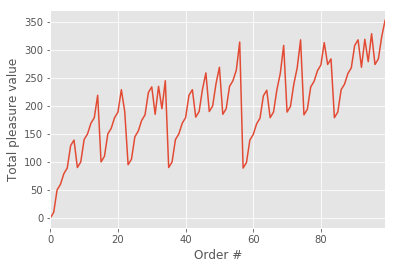

In [26]:
value_plot = summed_values.plot()
value_plot.set(xlabel="Order #", ylabel="Total pleasure value")

Neat!

## More Nonsense

To get more experience with these tools, I want to do a bit more. I'm going to add total calorie cost to the plot.

In [27]:
def total_cost(choice):
    """(list) -> int
    Given a list of foods, returns the sum of their costs."""
    total_cost = 0
    for food in choice:
        total_cost += food[2]
    return total_cost

In [28]:
summed_costs = []

for s in valid_choices:
    summed_costs.append(total_cost(s))

summed_costs

[0,
 195,
 95,
 290,
 150,
 345,
 245,
 440,
 365,
 560,
 460,
 655,
 515,
 710,
 610,
 354,
 549,
 449,
 644,
 504,
 699,
 599,
 719,
 258,
 453,
 353,
 548,
 408,
 603,
 503,
 698,
 623,
 718,
 612,
 707,
 154,
 349,
 249,
 444,
 304,
 499,
 399,
 594,
 519,
 714,
 614,
 669,
 508,
 703,
 603,
 658,
 412,
 607,
 507,
 702,
 562,
 657,
 123,
 318,
 218,
 413,
 273,
 468,
 368,
 563,
 488,
 683,
 583,
 638,
 733,
 477,
 672,
 572,
 627,
 722,
 381,
 576,
 476,
 671,
 531,
 726,
 626,
 746,
 735,
 277,
 472,
 372,
 567,
 427,
 622,
 522,
 717,
 642,
 737,
 631,
 726,
 535,
 730,
 630,
 685]

In [29]:
cost_value_data = pd.DataFrame({'Total pleasure': summed_values, 'Total cost': summed_costs})
cost_value_data

,Total cost,Total pleasure
0,0,0
1,195,10
2,95,50
3,290,60
4,150,79
5,345,89
6,245,129
7,440,139
8,365,90
9,560,100


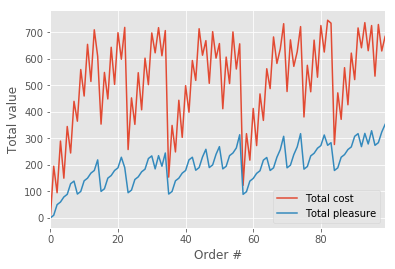

In [30]:
cvp = cost_value_data.plot()
cvp.set(xlabel="Order #", ylabel="Total value")